<a href="https://colab.research.google.com/github/iamtatha/Data_Science/blob/master/TCS_stock_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import  LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
plt.style.use('dark_background')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [6]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd 
df = pd.read_csv('gdrive/My Drive/Stocks/TCS/TCS.csv')

In [65]:
df=df.dropna()
df.iloc[35]

Date         2004-10-14
Open            137.875
High              140.5
Low             136.008
Close           139.525
Adj Close       74.2011
Volume       1.9226e+07
Name: 36, dtype: object

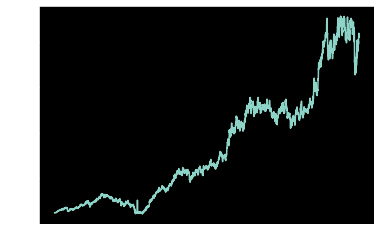

In [66]:
plt.plot(df['Close'])

In [165]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
print(training_data_len)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
train_data = scaled_data[0:training_data_len, : ]
x_train = []
y_train = []
df.iloc[3123]
len(dataset)

3108


3884

In [0]:
input_days = 75
pred_day = 0

for i in range( 1000+ input_days ,len(train_data) - pred_day):
  x_train.append(train_data[ i - input_days : i , 0 ])
  y_train.append(train_data[ i + pred_day , 0 ])
  if i<= input_days+1:
    print(x_train)
    print(y_train,end='\n')

In [0]:
x_train = np.array(x_train)

In [121]:
np.shape( x_train )

(4066, 75)

In [0]:
y_train = np.array(y_train)

In [123]:
np.shape( y_train )

(4066,)

In [124]:
x_train = np.reshape(x_train , ( x_train.shape[0] , x_train.shape[1] , 1 ))
x_train.shape

(4066, 75, 1)

In [125]:
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add( LSTM( 70, return_sequences = True, input_shape=(x_train.shape[1], 1 )) )
model.add( LSTM( 70, return_sequences = False ) )
model.add( Dense(30) )
model.add( Dense(1) )
#model.add(Dense(800,input_shape=(num_inputs,)))
#model.add(LeakyReLU(alpha=0.1))
model.compile(  loss='mean_squared_error', optimizer='adam' )
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
4066/4066 [==============================] - 208s 51ms/step - loss: 4.6314e-04


In [0]:
test_data = scaled_data[training_data_len - input_days: , :]
x_test =[]
y_test = dataset[training_data_len: , :]
for i in range( input_days , len(test_data)):
  x_test.append(test_data[i - input_days :i, 0])
x_test = np.array(x_test)
x_test =np.reshape( x_test , ( x_test.shape[0], x_test.shape[1] ,1 ))

In [127]:
x_test.shape

(776, 75, 1)

In [0]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

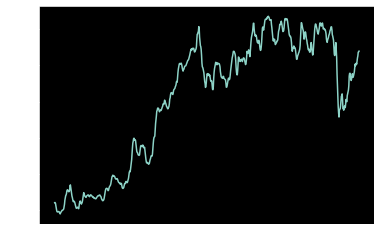

In [129]:
plt.plot(pred)

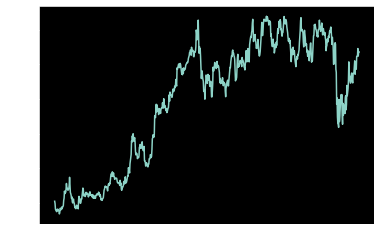

In [130]:
plt.plot(data[training_data_len:])

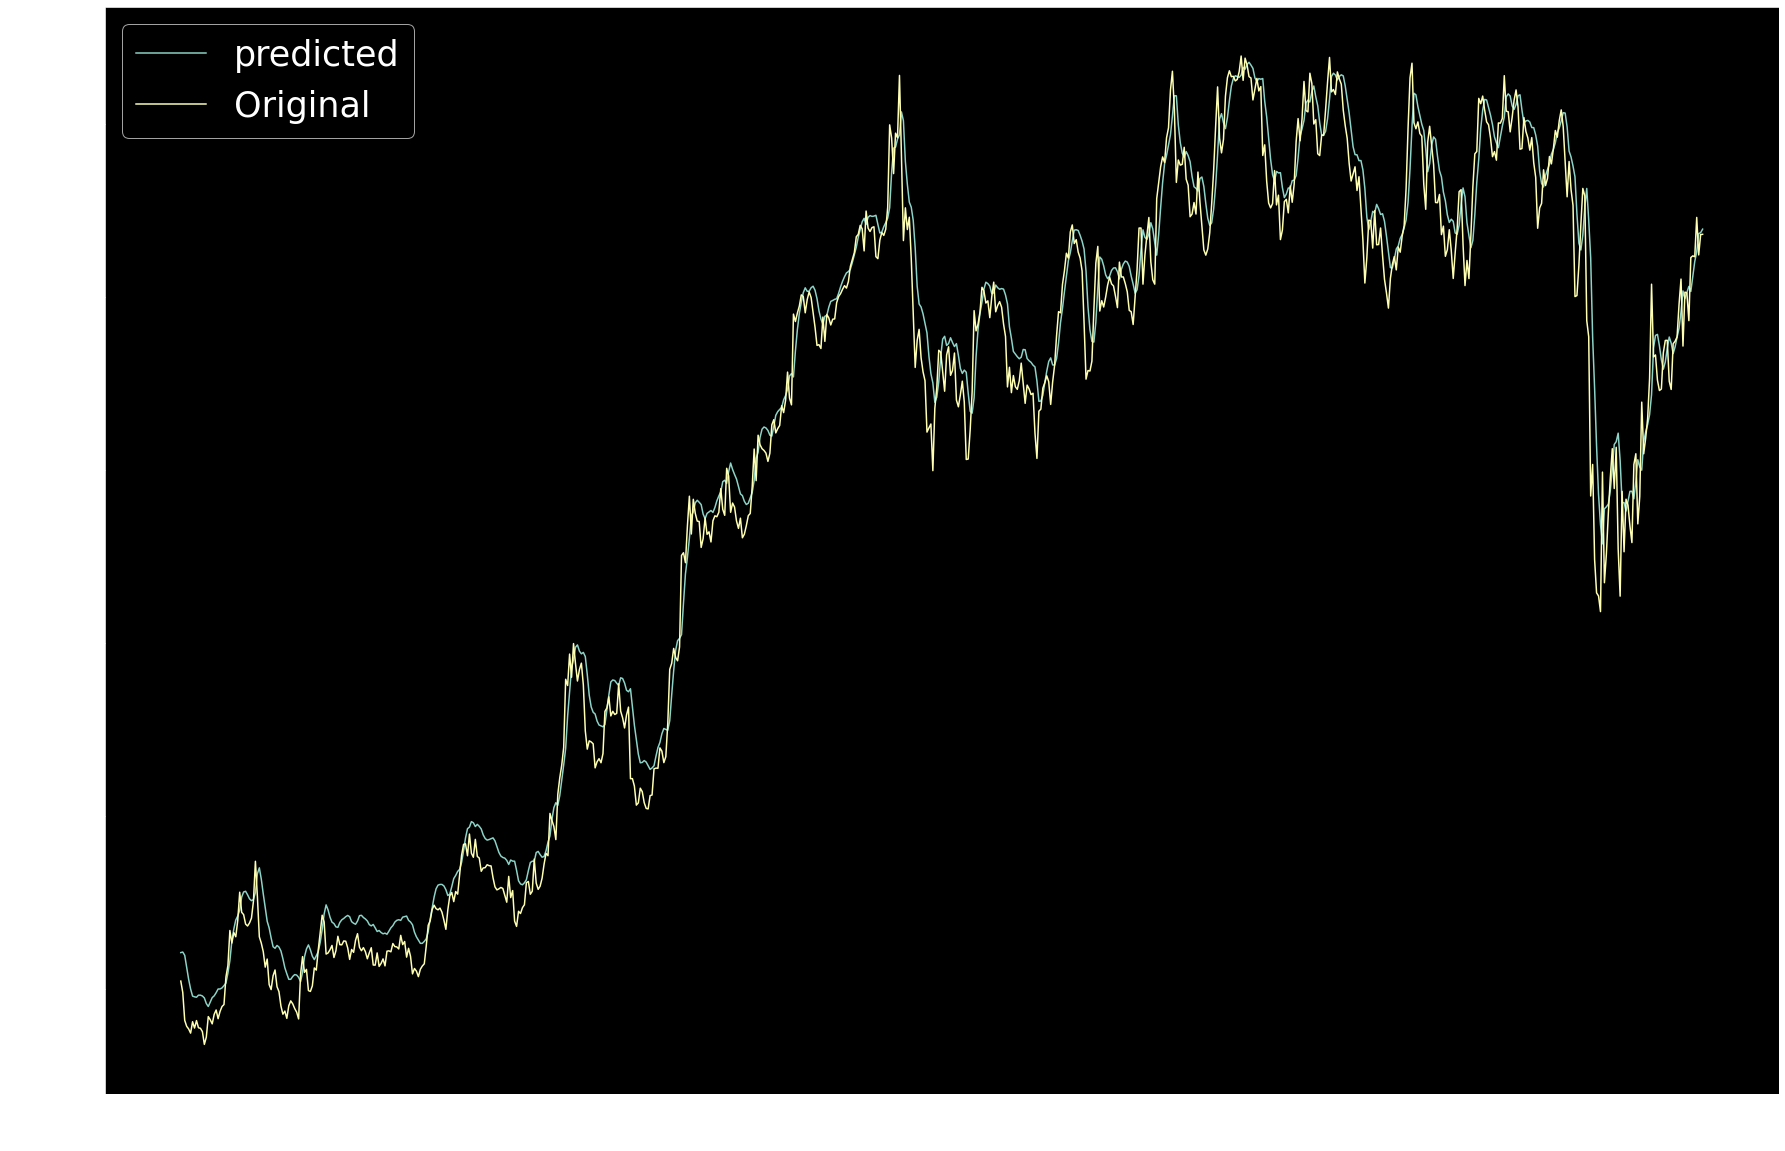

In [150]:
date = df.filter( 'Date' )[ training_data_len:]
l = np.arange(1,777,1)
fig = plt.figure(figsize=(30,20))
fig = plt.plot(l,pred,label='predicted')
fig = plt.plot(l,data[training_data_len:],label='Original')
plt.xlabel('Days from 11/4/2017 to 9/6/2020')
plt.ylabel('Stock Price')
plt.xticks(l,fontsize=30)
plt.yticks(fontsize=30)
plt.legend(prop={'size':35})
plt.savefig('E:\Study matters')

In [0]:
y_test = np.array(data[training_data_len:])

In [133]:
for i in range(776):
  print(pred[i] - y_test[i] )

[32.91259807]
[46.56921398]
[75.09423857]
[68.46997041]
[57.23828166]
[50.9390872]
[29.56799316]
[36.09375041]
[26.9442137]
[37.65759277]
[38.23913545]
[41.15917998]
[53.64184599]
[38.78186052]
[11.6546635]
[20.51965315]
[30.34875488]
[21.39709443]
[19.96191436]
[34.2911374]
[25.8503415]
[21.48034697]
[21.9388426]
[-7.1826169]
[-8.77185087]
[-34.88855022]
[2.41748076]
[4.03967256]
[19.35388142]
[5.19177275]
[-20.63781755]
[17.64648449]
[26.14318819]
[37.84899885]
[36.03173811]
[27.84692366]
[20.08081072]
[1.86401338]
[-36.05273438]
[26.03100598]
[79.67358381]
[73.7734375]
[66.72851521]
[68.69030791]
[43.61816365]
[65.41796834]
[59.70617634]
[33.48413045]
[25.04321289]
[47.66186565]
[51.48657198]
[63.59851033]
[64.05090303]
[49.95898467]
[51.49084484]
[30.5485837]
[24.8730467]
[31.5522458]
[39.17944336]
[42.8573001]
[48.02722138]
[-8.46167022]
[-18.03979451]
[18.0435788]
[23.60388201]
[52.72595185]
[48.0435788]
[34.18798799]
[9.65380842]
[16.5081783]
[-1.89624065]
[-11.01428264]
[-16.46

In [141]:
print(np.array(df.iloc[:,0])[training_data_len:])

['2017-04-11' '2017-04-12' '2017-04-13' '2017-04-17' '2017-04-18'
 '2017-04-19' '2017-04-20' '2017-04-21' '2017-04-24' '2017-04-25'
 '2017-04-26' '2017-04-27' '2017-04-28' '2017-05-02' '2017-05-03'
 '2017-05-04' '2017-05-05' '2017-05-08' '2017-05-09' '2017-05-10'
 '2017-05-11' '2017-05-12' '2017-05-15' '2017-05-16' '2017-05-17'
 '2017-05-18' '2017-05-19' '2017-05-22' '2017-05-23' '2017-05-24'
 '2017-05-25' '2017-05-26' '2017-05-29' '2017-05-30' '2017-05-31'
 '2017-06-01' '2017-06-02' '2017-06-05' '2017-06-06' '2017-06-07'
 '2017-06-08' '2017-06-09' '2017-06-12' '2017-06-13' '2017-06-14'
 '2017-06-15' '2017-06-16' '2017-06-19' '2017-06-20' '2017-06-21'
 '2017-06-22' '2017-06-23' '2017-06-27' '2017-06-28' '2017-06-29'
 '2017-06-30' '2017-07-03' '2017-07-04' '2017-07-05' '2017-07-06'
 '2017-07-07' '2017-07-10' '2017-07-11' '2017-07-12' '2017-07-13'
 '2017-07-14' '2017-07-17' '2017-07-18' '2017-07-19' '2017-07-20'
 '2017-07-21' '2017-07-24' '2017-07-25' '2017-07-26' '2017-07-27'
 '2017-07-

In [0]:
plt.show(fig)

In [151]:
print(np.array(df.iloc[:,0])[training_data_len:].T)

['2017-04-11' '2017-04-12' '2017-04-13' '2017-04-17' '2017-04-18'
 '2017-04-19' '2017-04-20' '2017-04-21' '2017-04-24' '2017-04-25'
 '2017-04-26' '2017-04-27' '2017-04-28' '2017-05-02' '2017-05-03'
 '2017-05-04' '2017-05-05' '2017-05-08' '2017-05-09' '2017-05-10'
 '2017-05-11' '2017-05-12' '2017-05-15' '2017-05-16' '2017-05-17'
 '2017-05-18' '2017-05-19' '2017-05-22' '2017-05-23' '2017-05-24'
 '2017-05-25' '2017-05-26' '2017-05-29' '2017-05-30' '2017-05-31'
 '2017-06-01' '2017-06-02' '2017-06-05' '2017-06-06' '2017-06-07'
 '2017-06-08' '2017-06-09' '2017-06-12' '2017-06-13' '2017-06-14'
 '2017-06-15' '2017-06-16' '2017-06-19' '2017-06-20' '2017-06-21'
 '2017-06-22' '2017-06-23' '2017-06-27' '2017-06-28' '2017-06-29'
 '2017-06-30' '2017-07-03' '2017-07-04' '2017-07-05' '2017-07-06'
 '2017-07-07' '2017-07-10' '2017-07-11' '2017-07-12' '2017-07-13'
 '2017-07-14' '2017-07-17' '2017-07-18' '2017-07-19' '2017-07-20'
 '2017-07-21' '2017-07-24' '2017-07-25' '2017-07-26' '2017-07-27'
 '2017-07-

In [152]:
print(np.array(df.iloc[:,0])[training_data_len:].shape)

(776,)


In [153]:
print(np.array(df.iloc[:,0])[training_data_len:].T.shape)

(776,)


In [154]:
print(np.array(df.iloc[:,0])[training_data_len:].reshape(776,1))

[['2017-04-11']
 ['2017-04-12']
 ['2017-04-13']
 ['2017-04-17']
 ['2017-04-18']
 ['2017-04-19']
 ['2017-04-20']
 ['2017-04-21']
 ['2017-04-24']
 ['2017-04-25']
 ['2017-04-26']
 ['2017-04-27']
 ['2017-04-28']
 ['2017-05-02']
 ['2017-05-03']
 ['2017-05-04']
 ['2017-05-05']
 ['2017-05-08']
 ['2017-05-09']
 ['2017-05-10']
 ['2017-05-11']
 ['2017-05-12']
 ['2017-05-15']
 ['2017-05-16']
 ['2017-05-17']
 ['2017-05-18']
 ['2017-05-19']
 ['2017-05-22']
 ['2017-05-23']
 ['2017-05-24']
 ['2017-05-25']
 ['2017-05-26']
 ['2017-05-29']
 ['2017-05-30']
 ['2017-05-31']
 ['2017-06-01']
 ['2017-06-02']
 ['2017-06-05']
 ['2017-06-06']
 ['2017-06-07']
 ['2017-06-08']
 ['2017-06-09']
 ['2017-06-12']
 ['2017-06-13']
 ['2017-06-14']
 ['2017-06-15']
 ['2017-06-16']
 ['2017-06-19']
 ['2017-06-20']
 ['2017-06-21']
 ['2017-06-22']
 ['2017-06-23']
 ['2017-06-27']
 ['2017-06-28']
 ['2017-06-29']
 ['2017-06-30']
 ['2017-07-03']
 ['2017-07-04']
 ['2017-07-05']
 ['2017-07-06']
 ['2017-07-07']
 ['2017-07-10']
 ['2017-

In [0]:
import csv
f = open('E:\Study matters\Machine Learning\Stocks\TCS\pred.csv','w',newline='')
w = csv.writer(f)

In [0]:
w.writerow(['Date', 'Original Price', 'Predicted Price'])
for i in range(776):
  w.writerow([np.array(df.iloc[:,0])[training_data_len:].reshape(776,1) , y_test[i] , pred[i] ])


In [0]:
f.close()

In [0]:
f = open('E:\Study matters\Machine Learning\Stocks\TCS\pred.csv','r')
c = csv.reader(f)

In [161]:
for i in c:
  print(i)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
f = open('pred.csv','w',newline='')
w = csv.writer(f)
w.writerow(['Date', 'Original Price', 'Predicted Price'])
for i in range(776):
  w.writerow([np.array(df.iloc[:,0])[training_data_len:].reshape(776,1) , y_test[i] , pred[i] ])
from google.colab import files
files.download('pred.csv')

In [163]:
type(pred[2])

numpy.ndarray

In [0]:
f = open('pred.csv','w',newline='')
w = csv.writer(f)
w.writerow(['Date', 'Original Price', 'Predicted Price'])
for i in range(776):
  w.writerow([np.array(df.iloc[:,0])[training_data_len+i] , str(y_test[i])[1:-1] , str(pred[i])[1:-1] ])
from google.colab import files
files.download('pred.csv')